As other supervised learning algorithms, naive bayes uses features to make a prediction on a target variable. The key difference is that naive bayes assumes that features are independent of each other and there is no correlation between features. However, this is not the case in real life. This naive assumption of features being uncorrelated is the reason why this algorithm is called “naive”.

Outline:

Probability and conditional probability

Bayes’ Theorem

Naive Bayes classifier

Pros and cons of naive Bayes classifier

Scikit-learn implementation

# Probability and conditional probability

We’ve learned where the “naive” comes from. How about the “bayes”? Bayes comes from the famous Bayes’ Theorem of Thomas Bayes. To get a comprehensive understanding of Bayes’ Theorem, we should talk about probability and conditional probability first.

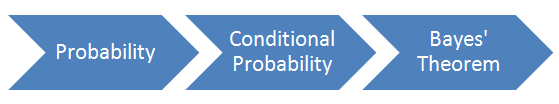

Probability simply means the likelihood of an event to occur and always takes a value between 0 and 1 (0 and 1 inclusive). 

The probability of event A is denoted as p(A) and calculated as the number of the desired outcome divided by the number of all outcomes.

For example, when you roll a die, the probability of getting a number less than three is 2 / 6. The number of desired outcomes is 2 (1 and 2); the number of total outcomes is 6.

Conditional probability is the likelihood of an event A to occur given that another event that has a relation with event A has already occurred. 

Suppose that we have 6 blue balls and 4 yellows placed in two boxes as seen below. 

I ask you to randomly pick a ball. 

The probability of getting a blue ball is 6 / 10 = 0,6.

What if I ask you to pick a ball from box A? The probability of picking a blue ball clearly decreases. 

The condition here is to pick from box A which clearly changes the probability of the event (picking a blue ball). 

The probability of event A given that event B has occurred is denoted as p(A|B).

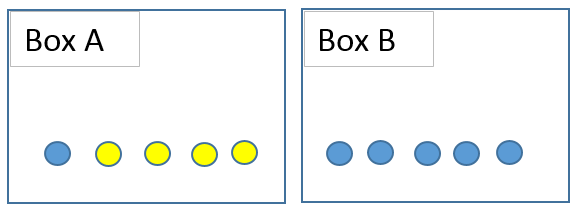

There is one more concept to learn before introducing Bayes’ Theorem. A joint probability is the probability of two events occurring together and denoted as p(A and B). For independent events, joint probability can be written as:

p(A and B) = p(A).p(B) ……… (1)

Let’s say I roll a die and flip a coin. The probability of getting 1 and heads is:

(1 / 6).(1/2) = 1/12 = 0.08

For this calculation to be correct, events must be independent.

The outcome of flipping a coin does not have any effect on the outcome of rolling a die so these events are independent

Let’s also give an example of dependent events - 

Picking one card from a deck and picked a second card from the same deck. 
The probability of a particular observation in the second pick certainly effected by the first pick

In the case of dependent events, equation 1 is not valid. It should be slightly changed to hold for any two events:

p(A and B) = p(A).p(B|A) ……… (2)

Equation (1) is a special case of equation (2) for independent events because if event B and event A independent, p(B|A) = p(B).

# Bayes’ Theorem

We will start with the fact that joint probability is commutative for any two events. That is:

p(A and B) = p(B and A) ……… (3)

From equation 2, we know that:

p(A and B) = p(A).p(B|A)

p(B and A) = p(B).p(A|B)

We can rewrite equation 3 as:

p(A).p(B|A) = p(B).p(A|B)

Dividing two sides by p(B) gives us the Bayes’ Theorem:


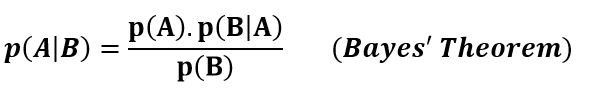

It’s time to see how Naive bayes classifier uses this theorem!

# Naive Bayes Classifier

Naive bayes is a supervised learning algorithm for classification so the task is to find the class of observation (data point) given the values of features

Naive bayes classifier calculates the probability of a class given a set of feature values (i.e. p(yi | x1, x2 , … , xn))

Input this into Bayes’ theorem:

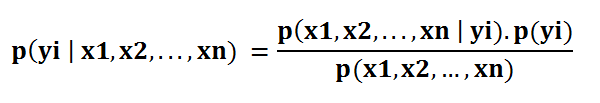

p(x1, x2 , … , xn | yi) means the probability of a specific combination of features given a class label. 

To be able to calculate this, we need extremely large datasets to have an estimate on the probability distribution for all different combinations of feature values. 

To overcome this issue, naive bayes algorithm assumes that all features are independent of each other. 

Furthermore, denominator (p(x1,x2, … , xn)) can be removed to simplify the equation because it only normalizes the value of conditional probability of a class given an observation ( p(yi | x1,x2, … , xn))

The probability of a class ( p(yi) ) is very simple to calculate:

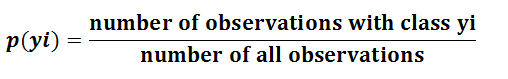

Under the assumption of features being independent, p(x1, x2 , … , xn | yi) can be written as:

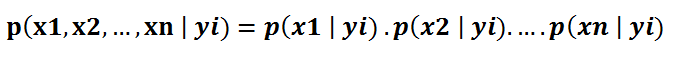

The conditional probability for a single feature given the class label (i.e. p(x1 | yi) ) can be more easily estimated from the data. 

The algorithm needs to store probability distributions of features for each class independently. For example, if there are 5 classes and 10 features, 50 different probability distributions need to be stored. 

The type of distributions depend on the characteristics of features:

For binary features (Y/N, True/False, 0/1): Bernoulli distribution
    
For discrete features (i.e. word counts): Multinomial distribution

For continuous features: Gaussian (Normal) distribution

It is common to name the naive bayes with the distribution of features (i.e. Gaussian naive bayes classifier). For mixed type datasets, a different type of distribution may be required for different features.

Adding all these up, it became an easy task for naive bayes algorithm to calculate the probability to observe a class given values of features (p(yi | x1, x2 , … , xn) )

# Pros and Cons of Naive Bayes Algorithm

Pros:

The assumption that all features are independent makes naive bayes algorithm very fast compared to complicated algorithms. In some cases, speed is preferred over higher accuracy.

It works well with high-dimensional data such as text classification, email spam detection.

Cons:

The assumption that all features are independent is not usually the case in real life so it makes naive bayes algorithm less accurate than complicated algorithms.

# Scikit-learn Implementation

In [15]:
#Importing libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB


In [16]:
#Using the Breast Cancer Dataset to perform Naive Bayes classification

df = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)


In [17]:
df=pd.DataFrame(df.data,columns=df.feature_names)

In [18]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [20]:
#we create a gaussian naive bayes classifier object and fit train data to the classifier:

clf_nb = GaussianNB().fit(X_train, y_train)

Finally, we measure the performance of our classifier on both train and test set.

In [21]:
print('Breast Cancer Data Set')

print('Accuracy of Gaussian Classifier on Training Set: {:.2f}'.format(clf_nb.score(X_train, y_train)))

print('Accuracy of Gaussian Classifier on Test Set: {:.2f}'.format(clf_nb.score(X_test, y_test)))

Breast Cancer Data Set
Accuracy of Gaussian Classifier on Training Set: 0.93
Accuracy of Gaussian Classifier on Test Set: 0.95


Accuracy is pretty high but this is a simple task used to show the concept and go through the steps of implementation. 

One important thing to remember is that the accuracy on the training set should not be much higher than the accuracy on the test set which indicates our model is too specific and not generalized well. 

This results in overfitting which is a serious problem for any machine learning algorithm